In [1]:
#!/usr/bin/env python
# coding: utf-8

import numpy as np
import matplotlib.pyplot as plt
import pykrige.kriging_tools as kt
from pykrige.ok import OrdinaryKriging
from pykrige.uk import UniversalKriging
import pandas as pd
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset# netcdf4-python module
from scipy.io import netcdf

In [2]:
df = pd.read_excel(u'C:\\Users\\Wang\\Desktop\\PythonTest\\interpolate\\dataP\\234_rankP_avg.xlsx')
#檔案欄位名稱
df.head()

,lon,lat,ID,1368,1369,1370,1371,1372,1373,1374,...,1902,1903,1904,1905,1906,1907,1908,1909,1910,1911
0,121.494508,31.339228,11000,0.0,0.0,0.0,0,0,0,0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,121.636161,31.230935,11001,0.0,0.0,0.0,0,0,0,0,...,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,121.549837,30.915938,11002,0.0,0.0,0.0,0,0,0,0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,121.212828,31.011963,11003,0.0,0.0,0.0,0,0,0,0,...,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,121.231712,30.833118,11004,0.0,0.0,0.0,0,0,0,0,...,1.0,0.0,0.0,0.555556,0.0,0.2,0.0,0.0,0.0,0.5


In [3]:
#df.shape[0]列數,df.shape[1]行數,df.shape
print df.shape[0],df.shape[1],df.shape

1565 547 (1565, 547)


In [4]:
df.columns.values[3]

1368

In [5]:
%matplotlib inline

In [6]:
#LON、LAT、RANKP為中國三千年氣象總集之紀錄資料
LON = df[u'lon'].values
LAT = df[u'lat'].values

In [ ]:
#for i in range(13):
for i in range(df.shape[1]):
    #i+3 = 從1368年開始，至1911年結束，共544年
    if (i+3) == (df.shape[1]):
        break
    RANKP = df.iloc[:,i+3]
    print df.columns.values[i+3]
    mask1 = df.iloc[:,i+3] > 0.001
    mask2 = df.iloc[:,i+3] <= 1
    testdf = df.loc[ mask1 & mask2]
    LONp1 = testdf[u'lon'].values
    LATp1 = testdf[u'lat'].values
    
    testdf = df.loc[df.iloc[:,i+3] > 1]
    LONp2 = testdf[u'lon'].values
    LATp2 = testdf[u'lat'].values
    testdf = df.loc[df.iloc[:,i+3] == 0]
    LONz = testdf[u'lon'].values
    LATz = testdf[u'lat'].values
    
    mask3 = df.iloc[:,i+3] < -0.001
    mask4 = df.iloc[:,i+3] >= -1
    testdf = df.loc[mask3 & mask4]
    LONn1 = testdf[u'lon'].values
    LATn1 = testdf[u'lat'].values
    testdf = df.loc[df.iloc[:,i+3] < -1]
    LONn2 = testdf[u'lon'].values
    LATn2 = testdf[u'lat'].values
    #要內插的點
    #gridx, gridy = np.mgrid[108:126, 20:44]
    gridx = np.arange(98.0, 126.0, 1.0)
    gridy = np.arange(17.0, 45.0, 1.0)
    # Create the ordinary kriging object. Required inputs are the X-coordinates of
    # the data points, the Y-coordinates of the data points, and the Z-values of the
    # data points. If no variogram model is specified, defaults to a linear variogram
    # model. If no variogram model parameters are specified, then the code automatically
    # calculates the parameters by fitting the variogram model to the binned
    # experimental semivariogram. The verbose kwarg controls code talk-back, and
    # the enable_plotting kwarg controls the display of the semivariogram.
    try:
        OK = OrdinaryKriging(LON, LAT, RANKP, variogram_model='linear', coordinates_type='geographic',
                             verbose=False, enable_plotting=False)

        #OK = OrdinaryKriging(LON, LAT, RANKP, variogram_model='linear',
        #verbose=True, enable_plotting=True)
        # Creates the kriged grid and the variance grid. Allows for kriging on a rectangular
        # grid of points, on a masked rectangular grid of points, or with arbitrary points.
        # (See OrdinaryKriging.__doc__ for more information.)
        z, ss = OK.execute('grid', gridx, gridy)
        # Writes the kriged grid to an ASCII grid file.
        #kt.write_asc_grid(gridx, gridy, z, filename="output.asc")
        
        #plot1
        fig = plt.figure(figsize=(20,10),dpi=100)
        X, Y = np.meshgrid(gridx, gridy)
        Z = z
        
        #plt.contourf(X, Y, Z, 20, cmap='RdGy')
        plt.contourf(X, Y, Z, 20, cmap='bwr')
        #plt.clim(-2,2)
        #plt.contourf(X, Y, Z, 20, cmap='gray')
        plt.colorbar()
        #plt.scatter(X,Y)
        type1 = plt.scatter(LONp1, LATp1, c='cornflowerblue',s = 50, marker='^')
        type2 = plt.scatter(LONp2, LATp2, c='blue',s = 100, marker='^')
        type3 = plt.scatter(LONz, LATz, c='green', marker='+')
        type4 = plt.scatter(LONn1, LATn1, c='peru',s = 50, marker='o')
        type5 = plt.scatter(LONn2, LATn2, c='saddlebrown',s = 100, marker='o')
        plt.legend((type2, type1, type3, type4, type5), (u'> 1', u'0.001~1', u'0',u'-0.001 ~ -1','< -1'), loc=2)
        plt.title(str(df.columns.values[i+3]) + 'variogram_model=linear',fontsize=20)
        plt.savefig(u'C:\\Users\\Wang\\Desktop\\PythonTest\\interpolate\\dataP\\figure\\' + str(df.columns.values[i+3]) + '.jpg')
        plt.close()
        
        #prepare write into Netcdf
        rankP = z
        lats = gridy
        lons = gridx
        
        # output to the new netCDF4 file
        path = 'C:\\Users\\Wang\\Desktop\\PythonTest\\interpolate\\dataP\\ncfile\\'
        f = netcdf.netcdf_file(path+str(df.columns.values[i+3])+'rankP.nc', 'w')
        f.createDimension('lat', rankP.shape[0])
        f.createDimension('lon', rankP.shape[1])
        Preci = f.createVariable('preci', 'f8', ('lat', 'lon'))
        lat = f.createVariable('lat', 'f8', ('lat', ))
        lon = f.createVariable('lon', 'f8', ('lon', ))
        Preci[:,:] = rankP[:,:]
        lat[:] = lats[:]
        lon[:] = lons[:]
        lat.units = "degrees_north"
        lon.units = "degrees_east"
        Preci.units = "RANK"
        f.close()
    except:
        print "Error:",df.columns.values[i+3]
        fig = plt.figure(figsize=(20,10),dpi=100)
        X, Y = np.meshgrid(gridx, gridy)
        Z = np.zeros([len(X),len(Y)])
        
        #plt.contourf(X, Y, Z, 20, cmap='RdGy')
        #plt.clim(-2,2)
        plt.contourf(X, Y, Z, 20, cmap='gray')
        plt.colorbar()
        plt.scatter(X,Y)
        plt.scatter(LON, LAT, c='green', marker='+')
        plt.title(str(df.columns.values[i+3]),fontsize=20)
        plt.savefig(u'C:\\Users\\Wang\\Desktop\\PythonTest\\interpolate\\dataP\\figure\\' + str(df.columns.values[i+3]) + '.jpg')
        plt.close()
        
        rankP = Z
        lats = gridy
        lons = gridx
        
        # output to the new netCDF4 file
        path = 'C:\\Users\\Wang\\Desktop\\PythonTest\\interpolate\\dataP\\ncfile\\'
        f = netcdf.netcdf_file(path+str(df.columns.values[i+3])+'rankP.nc', 'w')
        f.createDimension('lat', rankP.shape[0])
        f.createDimension('lon', rankP.shape[1])
        Preci = f.createVariable('preci', 'f8', ('lat', 'lon'))
        lat = f.createVariable('lat', 'f8', ('lat', ))
        lon = f.createVariable('lon', 'f8', ('lon', ))
        Preci[:,:] = rankP[:,:]
        lat[:] = lats[:]
        lon[:] = lons[:]
        lat.units = "degrees_north"
        lon.units = "degrees_east"
        Preci.units = "RANK"
        f.close()

1368
1369
1370
1371
1372
1373
1374
1375
1376
1377
1378
Error: 1378
1379
1380
1381
1382
Error: 1382
1383
Error: 1383
1384
1385
1386
1387
1388
Error: 1388
1389
1390
1391
1392
1393
1394
Error: 1394
1395
Error: 1395
1396
1397
1398
1399
Error: 1399
1400
Error: 1400
1401
1402
Error: 1402
1403
1404
1405
1406
1407
1408
1409
1410
1411
1412
1413
1414
1415
1416
1417
1418
1419
1420
1421
1422
1423
1424
1425
1426
1427
1428
1429
1430
1431
1432
1433
1434
1435
1436
1437
1438
1439
1440
1441
1442
1443
1444
1445
1446
1447
1448
1449
1450
1451
1452
1453
1454
1455
1456
1457
1458
1459
1460
1461
1462
1463
1464
1465
1466
1467
1468
1469
1470
1471
1472
1473
1474
1475
1476
1477
1478
1479
1480
1481
1482
1483
1484
1485
1486
1487
1488
1489
1490
1491
1492
1493
1494
1495
1496
1497
1498
1499
1500
1501
1502
1503
1504
1505
1506
1507
1508
1509
1510
1511
1512
1513
1514
1515
1516
1517
1518
1519
1520
1521
1522
1523
1524
1525
1526
1527
1528
1529
1530
1531
1532
1533
1534
1535
1536
1537
1538
1539
1540
1541
1542
1543
1544
1545
15

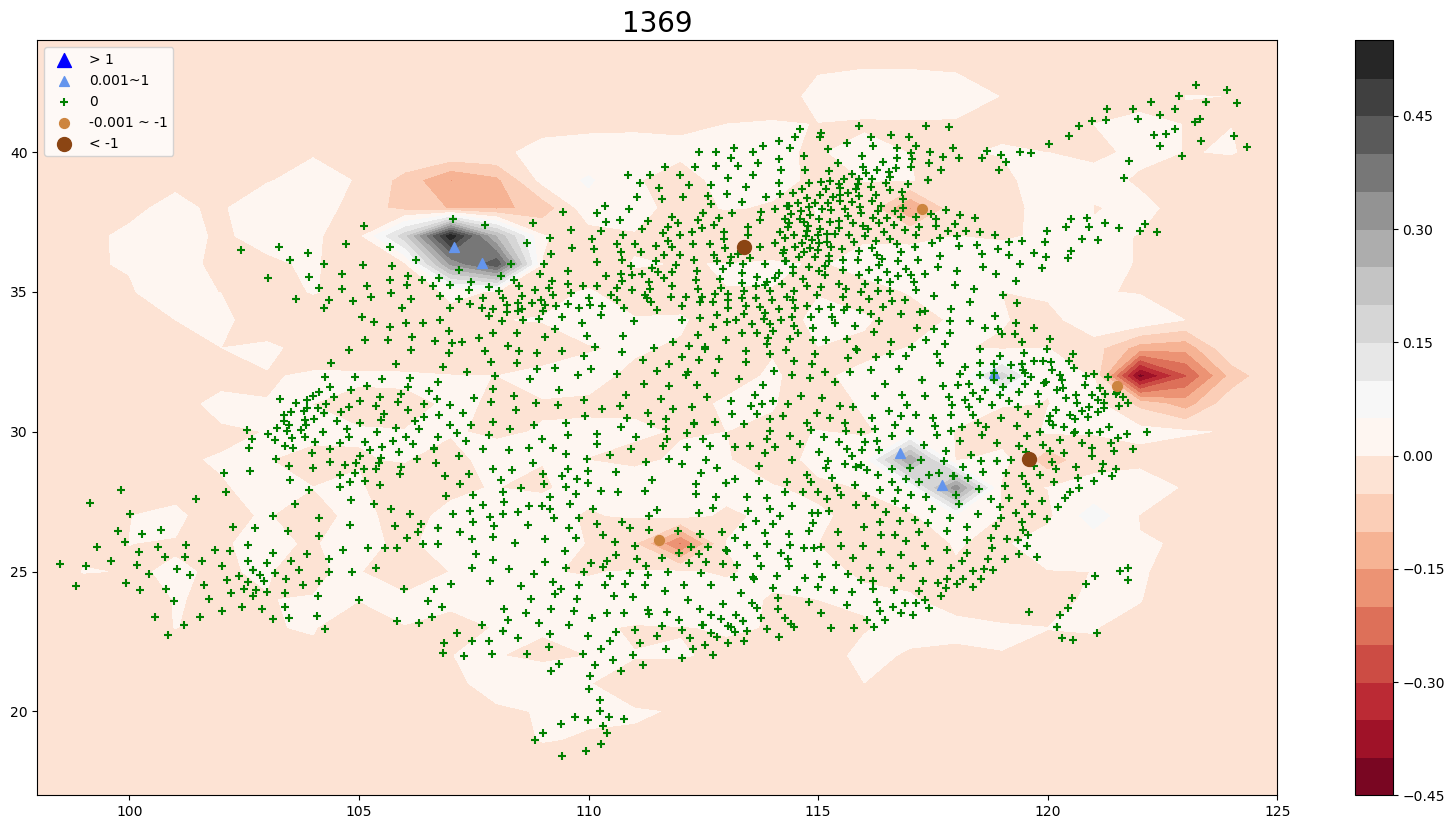

In [18]:
i=1
RANKP = df.iloc[:,i+3]
mask1 = df.iloc[:,i+3] > 0.001
mask2 = df.iloc[:,i+3] <= 1
testdf = df.loc[ mask1 & mask2]
LONp1 = testdf[u'lon'].values
LATp1 = testdf[u'lat'].values
    
testdf = df.loc[df.iloc[:,i+3] > 1]
LONp2 = testdf[u'lon'].values
LATp2 = testdf[u'lat'].values
testdf = df.loc[df.iloc[:,i+3] == 0]
LONz = testdf[u'lon'].values
LATz = testdf[u'lat'].values
    
mask3 = df.iloc[:,i+3] < -0.001
mask4 = df.iloc[:,i+3] >= -1
testdf = df.loc[mask3 & mask4]
LONn1 = testdf[u'lon'].values
LATn1 = testdf[u'lat'].values
testdf = df.loc[df.iloc[:,i+3] < -1]
LONn2 = testdf[u'lon'].values
LATn2 = testdf[u'lat'].values
#要內插的點
#gridx, gridy = np.mgrid[108:126, 20:44]
gridx = np.arange(98.0, 126.0, 1.0)
gridy = np.arange(17.0, 45.0, 1.0)
# Create the ordinary kriging object. Required inputs are the X-coordinates of
# the data points, the Y-coordinates of the data points, and the Z-values of the
# data points. If no variogram model is specified, defaults to a linear variogram
# model. If no variogram model parameters are specified, then the code automatically
# calculates the parameters by fitting the variogram model to the binned
# experimental semivariogram. The verbose kwarg controls code talk-back, and
# the enable_plotting kwarg controls the display of the semivariogram.
   
OK = OrdinaryKriging(LON, LAT, RANKP, variogram_model='spherical', coordinates_type='geographic',
                    verbose=False, enable_plotting=False)        
z, ss = OK.execute('grid', gridx, gridy)
# Writes the kriged grid to an ASCII grid file.
#kt.write_asc_grid(gridx, gridy, z, filename="output.asc")
        
#plot1
fig = plt.figure(figsize=(20,10),dpi=100)
X, Y = np.meshgrid(gridx, gridy)
Z = z
        
plt.contourf(X, Y, Z, 20, cmap='RdGy')
#plt.clim(-2,2)
#plt.contourf(X, Y, Z, 20, cmap='gray')
plt.colorbar()
#plt.scatter(X,Y)
type1 = plt.scatter(LONp1, LATp1, c='cornflowerblue',s = 50, marker='^')
type2 = plt.scatter(LONp2, LATp2, c='blue',s = 100, marker='^')
type3 = plt.scatter(LONz, LATz, c='green', marker='+')
type4 = plt.scatter(LONn1, LATn1, c='peru',s = 50, marker='o')
type5 = plt.scatter(LONn2, LATn2, c='saddlebrown',s = 100, marker='o')
plt.legend((type2, type1, type3, type4, type5), (u'> 1', u'0.001~1', u'0',u'-0.001 ~ -1','< -1'), loc=2)
plt.title(str(df.columns.values[i+3]),fontsize=20)
plt.show()